C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


[INFO] Model loaded successfully.
[INFO] Starting webcam... Press 'q' to quit.


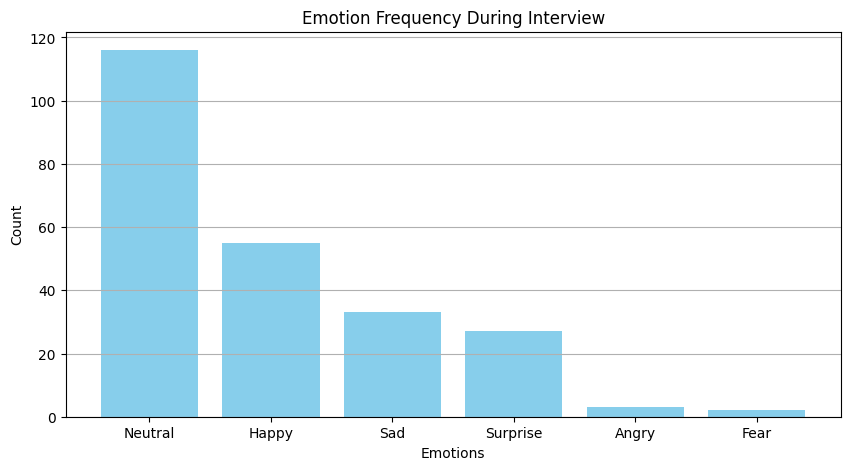


🧾 Interview Feedback Report
----------------------------
Neutral   : 116 times (49.2%)
Happy     : 55 times (23.3%)
Sad       : 33 times (14.0%)
Surprise  : 27 times (11.4%)
Angry     : 3 times (1.3%)
Fear      : 2 times (0.8%)

⭐ Dominant Emotion: Neutral
✅ Appears confident and composed.


In [1]:
# 📦 Install required packages
!pip install opencv-python tensorflow numpy matplotlib

# 📚 Import libraries
import cv2
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

# 📁 Load the model directly from .h5
h5_path = r"C:\Users\sagni\Downloads\Emotion Aware Virtual Interviewer\model.h5"
model = tf.keras.models.load_model(h5_path)
print("[INFO] Model loaded successfully.")

# 🏷️ Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ✅ FIXED: Use RGB instead of grayscale
def preprocess_face(face_img):
    face_img = cv2.resize(face_img, (48, 48))
    face_img = face_img.astype('float32') / 255.0
    face_img = np.expand_dims(face_img, axis=0)
    return face_img  # shape (1, 48, 48, 3)

# 🎥 Start webcam + prediction
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_log = []

print("[INFO] Starting webcam... Press 'q' to quit.")
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face_img = frame[y:y+h, x:x+w]
        processed = preprocess_face(face_img)
        pred = model.predict(processed, verbose=0)
        emotion = emotion_labels[np.argmax(pred)]

        # Draw box + label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)

        # Log emotion
        timestamp = datetime.now().strftime('%H:%M:%S')
        emotion_log.append((timestamp, emotion))

    cv2.imshow('Emotion-Aware Interviewer', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# 📊 Summary Chart
emotions_only = [e for _, e in emotion_log]
emotion_counts = Counter(emotions_only)

plt.figure(figsize=(10,5))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Emotion Frequency During Interview")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# 🧾 Feedback Report
print("\n🧾 Interview Feedback Report")
print("----------------------------")
total = len(emotions_only)
for emo, count in emotion_counts.items():
    print(f"{emo:10}: {count} times ({(count/total)*100:.1f}%)")

dominant_emotion = emotion_counts.most_common(1)[0][0]
print("\n⭐ Dominant Emotion:", dominant_emotion)

if dominant_emotion in ['Happy', 'Neutral']:
    print("✅ Appears confident and composed.")
elif dominant_emotion in ['Fear', 'Sad', 'Angry']:
    print("⚠️ Possible signs of nervousness or discomfort.")
else:
    print("ℹ️ Mixed emotional signals.")
